CSCI 5636 Homework 1
Luke Meszar
9/16/2018

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from random import uniform

plt.style.use('ggplot')

def diffmat(n, h):
    D = np.zeros((n,n))
    D[0,0] = -3
    D[0,1] = 4
    D[0,2] = -1
    D[n-1,-3] = 1
    D[n-1,-2] = -4
    D[n-1,-1] = 3
    for i in range(1,n-1):
        D[i,i-1] = -1
        D[i,i+1] = 1
    return (1/(2*h))*D

def diffmat_uneven(n,x):
    D = np.zeros((n,n))
    h_left_end = x[2] - x[0]
    D[0,0] = -3/h_left_end
    D[0,1] = 4/h_left_end
    D[0,2] = -1/h_left_end
    h_right_end = x[-1] - x[-3]
    D[n-1,-3] = 1/h_right_end
    D[n-1,-2] = -4/h_right_end
    D[n-1,-1] = 3/h_right_end
    for i in range(1,n-1):
        h_i = x[i+1] - x[i-1]
        D[i,i-1] = -1/h_i
        D[i,i+1] = 1/h_i
    return D

The endpoint formula for the second derivative is based on the forward differencing method from https://www.geometrictools.com/Documentation/FiniteDifferences.pdf

In [ ]:
def diff2mat(n,h):
    D = np.zeros((n,n))
    D[0,0] = 1
    D[0,1] = -2
    D[0,2] = 1
    D[n-1,-3] = 1
    D[n-1,-2] = -2
    D[n-1,-1] = 1
    for i in range(1,n-1):
        D[i,i-1] = 1
        D[i,i] = -2
        D[i,i+1] = 1
    return (1/h**2)*D

def diff2mat_uneven(n,x):
    D = np.zeros((n,n))
    h_left_end = (((x[1] - x[0]))/2)**2
    D[0,0] = 1/h_left_end
    D[0,1] = -2/h_left_end
    D[0,2] = 1/h_left_end
    h_right_end = (((x[-1] - x[-2]))/2)**2
    D[n-1,-3] = 1/h_right_end
    D[n-1,-2] = -2/h_right_end
    D[n-1,-1] = 1/h_right_end
    for i in range(1,n-1):
        h_i = (((x[i+1] - x[i]))/2)**2
        D[i,i-1] = 1/h_i
        D[i,i] = -2/h_i
        D[i,i+1] = 1/h_i
    return D

In [ ]:
def plot_exact_vs_numerical(x, numerical_derivative, exact_derivative):
    plt.plot(x,numerical_derivative,'o')
    plt.plot(x,exact_derivative)

In [17]:
def test_first_derivative(f, fp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    u = f(x)
    D = diffmat(n,h)
    up = np.matmul(D,u)
    fpx = fp(x)
    return x, up, fpx
    


In [18]:
def test_first_derivative_uneven_grid(f, fp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    left_displacement = uniform(0,h/4)
    x[0] = x[0] + left_displacement
    for i in range(1,len(x)-1):
        displacement = uniform(-h/4,h/4)
        x[i] = x[i] + displacement
    right_displacement = uniform(-h/4,0)
    x[-1] = x[-1] + right_displacement
    u = f(x)
    D = diffmat_uneven(n,x)
    up = np.matmul(D,u)
    fpx = fp(x)
    return x, up, fpx

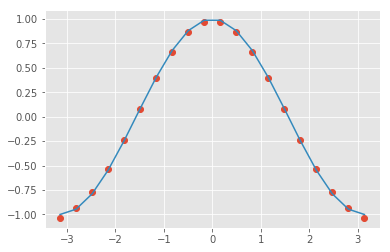

In [19]:
x, up, fpx = test_first_derivative(np.sin, np.cos, 20, (-np.pi,np.pi))
plot_exact_vs_numerical(x, up, fpx)


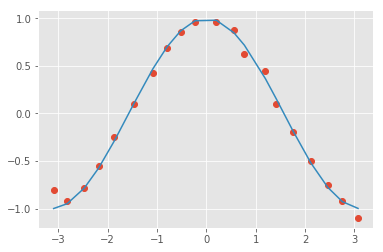

In [20]:
xug, upug, fpxug = test_first_derivative_uneven_grid(np.sin, np.cos, 20, (-np.pi,np.pi))
plot_exact_vs_numerical(xug, upug, fpxug)

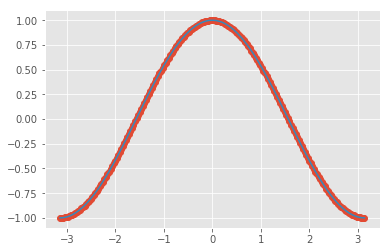

In [21]:
x, up, fpx = test_first_derivative(np.sin, np.cos, 200, (-np.pi,np.pi))
plot_exact_vs_numerical(x, up, fpx)

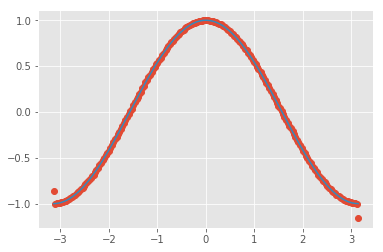

In [22]:
xug, upug, fpxug = test_first_derivative_uneven_grid(np.sin, np.cos, 200, (-np.pi,np.pi))
plot_exact_vs_numerical(xug, upug, fpxug)

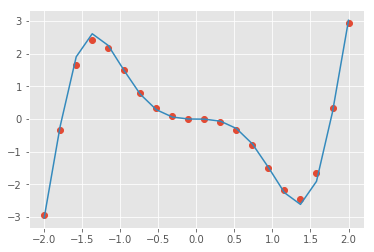

In [23]:
def func1(x):
    return np.cos(x**2)

def func1p(x):
    return -2*x*np.sin(x**2)

x, up, fpx = test_first_derivative(func1, func1p, 20, (-2,2))
plot_exact_vs_numerical(x, up, fpx)

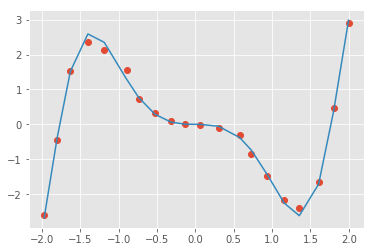

In [24]:
xug, upug, fpxug = test_first_derivative_uneven_grid(func1, func1p, 20, (-2,2))
plot_exact_vs_numerical(xug, upug, fpxug)

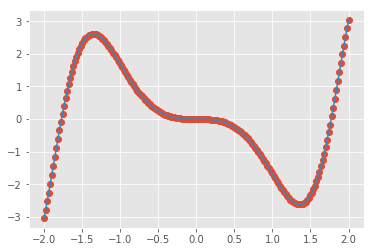

In [25]:
x, up, fpx = test_first_derivative(func1, func1p, 200, (-2,2))
plot_exact_vs_numerical(x, up, fpx)

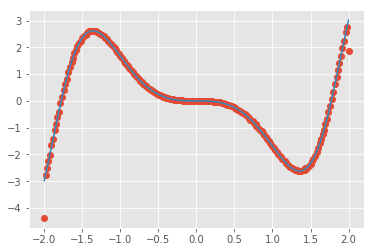

In [26]:
xug, upug, fpxug = test_first_derivative_uneven_grid(func1, func1p, 200, (-2,2))
plot_exact_vs_numerical(xug, upug, fpxug)

In [31]:
def test_second_derivative(f, fpp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    u = f(x)
    D = diff2mat(n,h)
    upp = np.matmul(D,u)
    fppx = fpp(x)
    return x, upp, fppx

def test_second_derivative_uneven_grid(f, fpp, n, domain):
    x = np.linspace(domain[0], domain[1], n)
    h = (domain[1] - domain[0])/(n-1)
    left_displacement = uniform(0,h/4)
    x[0] = x[0] + left_displacement
    for i in range(1,len(x)-1):
        displacement = uniform(-h/4,h/4)
        x[i] = x[i] + displacement
    right_displacement = uniform(-h/4,0)
    x[-1] = x[-1] + right_displacement
    u = f(x)
    D = diff2mat_uneven(n,x)
    #D = diff2mat(n,h)
    upp = np.matmul(D,u)
    fppx = fpp(x)
    return x, upp, fppx

In [32]:
def func2(x):
    return np.sin(x)

def func2pp(x):
    return -np.sin(x)

def func3(x):
    return np.tanh(x)

def func3pp(x):
    return -2*np.tanh(x)*(np.cosh(x)**(-2))

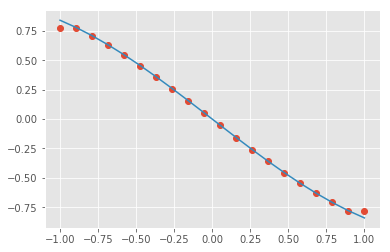

In [33]:
x, upp, fppx = test_second_derivative(func2, func2pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx)

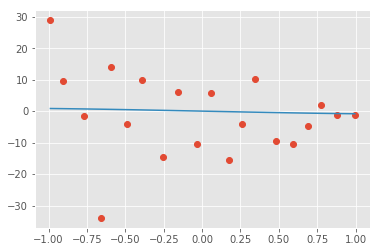

In [36]:
x, upp, fppx = test_second_derivative_uneven_grid(func2, func2pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx)

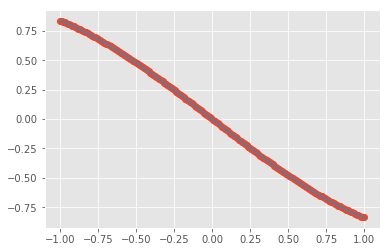

In [37]:
x, upp, fppx = test_second_derivative(func2, func2pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx)

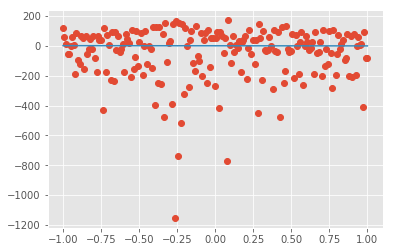

In [38]:
x, upp, fppx = test_second_derivative_uneven_grid(func2, func2pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx)

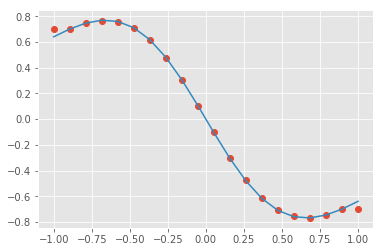

In [39]:
x, upp, fppx = test_second_derivative(func3, func3pp, 20, (-1,1))
plot_exact_vs_numerical(x, upp, fppx)

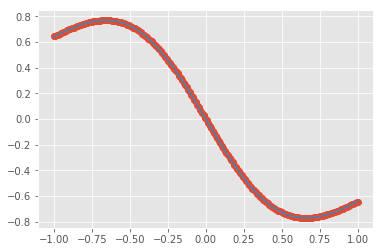

In [40]:
x, upp, fppx = test_second_derivative(func3, func3pp, 200, (-1,1))
plot_exact_vs_numerical(x, upp, fppx)

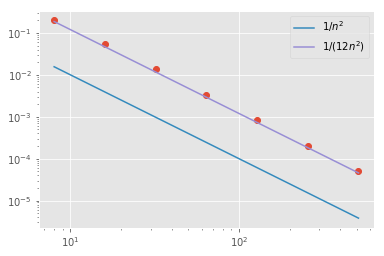

In [41]:
def grid_refinement_error(diff, domain, f, derivative_of_f):
    grids = 2**np.arange(3,10)
    error = []
    for n in grids:
        x = np.linspace(domain[0], domain[1], n)
        xx, yy, _ = diff(f, derivative_of_f, n, domain)
        error.append(np.linalg.norm(yy-derivative_of_f(xx), np.inf))
    return grids, error
grids, error = grid_refinement_error(test_first_derivative, (-np.pi,np.pi), np.sin,np.cos)
plt.loglog(grids, error, 'o')
plt.loglog(grids, grids**(-2.), label='$1/n^2$')
plt.loglog(grids, 12*grids**(-2.), label='$1/(12n^2)$')
plt.legend(loc='upper right');

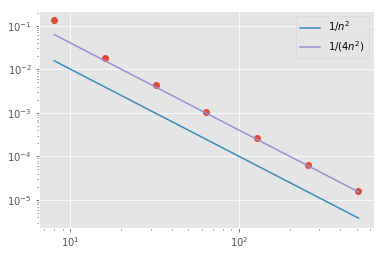

In [42]:
grids, error = grid_refinement_error(test_first_derivative, (-1,1), func1, func1p)
plt.loglog(grids, error, 'o')
plt.loglog(grids, grids**(-2.), label='$1/n^2$')
plt.loglog(grids, 4*grids**(-2.), label='$1/(4n^2)$')
plt.legend(loc='upper right');

In [43]:
grids, error = grid_refinement_error(test_second_derivative, (-1,1), func2, func2pp)

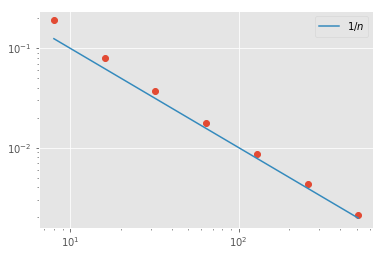

In [44]:
plt.loglog(grids, error, 'o')
plt.loglog(grids, grids**(-1.), label='$1/n$')
plt.legend(loc='upper right');

In [ ]:
grids, error = grid_refinement_error(test_second_derivative, (-1,1), func3, func3pp)
plt.loglog(grids, error, 'o')
plt.loglog(grids, grids**(-1.), label='$1/n$')
plt.legend(loc='upper right');